# Cancer remission and tumor stability

In [1]:
import numpy as np
from agent_model import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns

%matplotlib inline

## Modelo de agentes v1

* Equilateral triangle 2D lattice.
* Fixed position tumor cell and moving T-Cells.
* Cell division as a function of blood irrigation (nutrient availability).
* Rigid and periodic boundary conditions.
* Cell necrosis as a function of its distance to the tumor surface.

In [2]:
N = 50
timesteps = 200
center_pos = N**2//2 + N//2
hc = Tissue(N, center_pos, boundary="rigid")

for i in range(timesteps):
    hc.timestep()

In [3]:
interact(hc.plot_tumor, timestep=widgets.IntSlider(value=0, min=0, max=timesteps))

A Jupyter Widget

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

In [4]:
def t_r(t=0):
    f = plt.figure(figsize=(8,8))
    ax = sns.heatmap(hc.resources[t].reshape(N,N),vmin=0,vmax=100)
    plt.show()
interact(t_r,t=(0,timesteps,1))

A Jupyter Widget

<function __main__.t_r>

In [56]:
death_count = []
alive_count = []
for k in hc.history:
    counter_1 = 0
    counter_2 = 0
    for t in k:
        if t != None:
            if t.state ==0:
                counter_1 += 1
            if t.state == 1:
                counter_2 += 1
    death_count.append(counter_2)
    alive_count.append(counter_1)
death_count = np.array(death_count)
alive_count = np.array(alive_count)

/Users/pabloibarra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


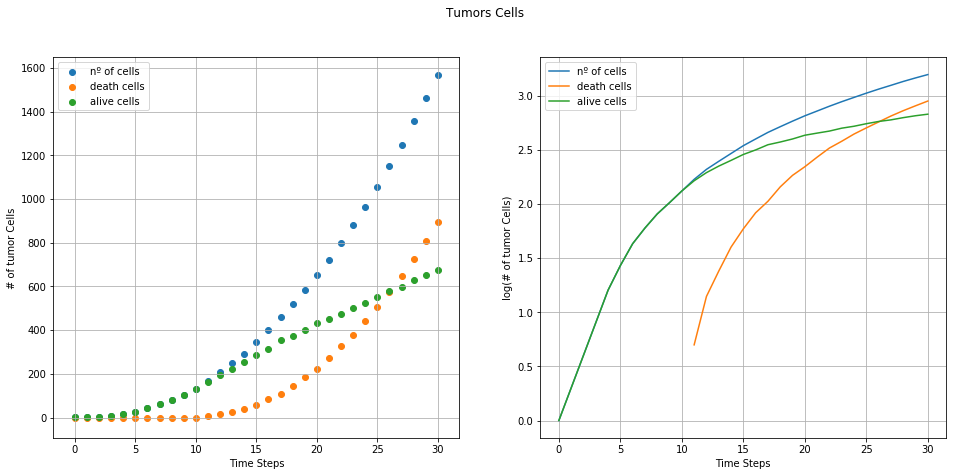

In [59]:
f = plt.figure(figsize=(16,7))
f.suptitle('Tumors Cells')
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

tumor_history = np.sum(np.array(hc.history) != None,axis=1)

ax.scatter(np.arange(len(tumor_history)), tumor_history,label='nº of cells')
ax.scatter(np.arange(len(tumor_history)), death_count,label='death cells')
ax.scatter(np.arange(len(tumor_history)), alive_count,label='alive cells')

ax.set_ylabel("# of tumor Cells")
ax.set_xlabel("Time Steps")
ax.grid(True)

ax2.plot(np.arange(len(tumor_history)), np.log10(tumor_history),label='nº of cells')
ax2.plot(np.arange(len(death_count)), np.log10(death_count),label='death cells')
ax2.plot(np.arange(len(tumor_history)), np.log10(alive_count),label='alive cells')

ax2.set_ylabel("log(# of tumor Cells)")
ax2.set_xlabel("Time Steps")
ax2.grid(True)
ax.legend()
ax2.legend()
plt.show()